# Pengantar _Computer Aided Cell Factory Design_
Oleh: **Matin Nuhamunada, M.Sc.** \
_Laboratorium Bioteknologi, Fakultas Biologi, Universitas Gadjah Mada_ \
_matin_nuhamunada@ugm.ac.id_

## Daftar Isi
* [Pengantar](#section1)
* [Setting Up Environment](#section2)
* [Database genome-scale metabolic model](#section3)
* [Eksplorasi dan Simulasi Model](#section4)
* [Manipulasi model & Aplikasi](#section5)
    * [Membuat knock-out](#section5-1)
    * [Mengubah medium](#section5-2)
    * [Mengubah objektif](#section5-3)
    * [Aplikasi: ekspresi heterologous vanilin](#section5-4)
* [What's next? COBRA Plugins & DD Decaf](#section6)
<a name="section1"></a>

## Pengantar
Materi ini ditulis dalam rangka mendampingi workshop Brainstorming BIOS yang diselenggarakan oleh BEM Fakultas Biologi UGM. Workshop ini bertujuan untuk mengenalkan bagaimana CAD (_Computer Aided Design_) diaplikasikan dalam bioteknologi / metabolic engineering. Materi pada workshop ini diringkas dari workshop Metabolic Modeling for Cell Factory Design dari DTU Biosustain, dan selengkapnya dapat diakses di https://biosustain.github.io/cell-factory-design-course/.

[**Slide pengantar workshop dapat diakses di sini.**](https://drive.google.com/file/d/1tB-edC5l5apt0Bi8riDjBBar6J--yasf/view?usp=sharing)

Karena materi pada workshop ini lebih ke arah praktis, ada baiknya peserta juga mempelajari materi / kuliah [**Transformasi Digital**](https://elok.ugm.ac.id/course/view.php?id=632) (skill dasar Python), [**Bioinformatika**](https://elok.ugm.ac.id/course/view.php?id=1136), dan **Bioteknologi** (Pengantar Systems & Synthetic Biology). Materi kuliah pengantar systems & synthetic biology (archive Kuliah Bioteknologi semester genap 2020) dapat diakses di: http://ugm.id/lectsystembio2020 & http://ugm.id/lectsyntheticbio2020
<a name="section2"></a>

## Setting Up Environment
* Saya merekomendasikan untuk menggunakan OS Ubuntu/Linux (ex: menggunakan [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10))
* Ikuti petunjuk instalasi Conda di: https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html#
* Buat environment sesuai petunjuk di https://biosustain.github.io/cell-factory-design-course/setup/

### Jika ada problem dengan instalasi environment
Jika ada problem dengan instalasi library, coba install dengan cara berikut:
> *conda install -c conda-forge jupyterlab* \
> *pip install cameo* \
> *pip install escher* \
> *conda install -c conda-forge nodejs* \
> *jupyter labextension install @jupyter-widgets/jupyterlab-manager* \
> *jupyter labextension install escher*

<a name="section3"></a>

## Database Genome Scale Metabolic Model
* Buka database: http://bigg.ucsd.edu/
* Cari model: **e_coli_core**
* Ada berapa banyak metabolit, reaksi, dan gen pada model tersebut?
* Genom apa yang digunakan sebagai dasar dari model tersebut?
* Reaksi & stoikiometri?
* Escher Map?
* Bandingkan [**e_coli_core**](http://bigg.ucsd.edu/models/e_coli_core) dengan [**iML1515**](http://bigg.ucsd.edu/models/iML1515). Apa perbedaan dari kedua model tersebut? Jumlah Metabolit, Reaksi, Gen? Referensi genom? Escher Map? 
<a name="section4"></a>

## Eksplorasi dan Simulasi Model

In [1]:
# load library
from cameo import models
from cameo import load_model
from cameo import fba
from escher import Builder
from cobra import Reaction, Metabolite

In [2]:
# load model e_coli_core
# model ini sudah tersedia di library
model = load_model('e_coli_core')

# ada berapa banyak metabolit & reaksi? Objektif? 
model

# bagaimana mengakses model yang ada di BIGG?
#models.index_models_bigg()
#models.bigg.iML1515

# anda juga bisa mengunduh model (format SBML) kemudian load model dengan menggunakan cameo

Name,e_coli_core
Memory address,0x07fd3a6a98760
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [3]:
# bagaimana mengakses komponen dalam model?
#model.genes

# ada berapa banyak gen? 
len(model.genes)

137

In [4]:
# load escher map - map kosong tanpa data
builder = Builder(
    map_name='e_coli_core.Core metabolism'
)
builder

Builder()

<img src="maps/01.svg">

In [5]:
# mari kita mencari tahu informasi terkait g3p_c, c disini menunjukkan lokasi metabolit 
model.metabolites.get_by_id('g3p_c')

# ada berapa reaksi yang menggunakan g3p_c?

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x07fd3b7dc6dc0
Formula,C3H5O6P
Compartment,c
In 7 reaction(s),"TKT1, TALA, FBA, TPI, GAPD, TKT2, BIOMASS_Ecoli_core_w_GAM"


In [6]:
# detail reaksi FBA - Fructose-bisphosphate aldolase
model.reactions.get_by_id('FBA')

Reaction identifier,FBA
Name,Fructose-bisphosphate aldolase
Memory address,0x07fd3b7bc6c70
Stoichiometry,"fdp_c <=> dhap_c + g3p_c D-Fructose 1,6-bisphosphate <=> Dihydroxyacetone phosphate + Glyceraldehyde 3-phosphate"
GPR,b2097 or b1773 or b2925
Lower bound,-1000.0
Upper bound,1000.0


In [7]:
# simulasi model
s = fba(model)
flux = s.fluxes.to_frame()
s.objective_value
#flux.loc['FBA', 'fluxes']

0.8739215069684303

In [8]:
# map fluxes
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    reaction_data=s.fluxes,
)
builder

Builder(reaction_data={'PFK': 7.477381962160287, 'PFL': 0.0, 'PGI': 4.860861146496827, 'PGK': -16.023526143167…

<img src="maps/02.svg">

<a name="section5"></a>

## Manipulasi Model
<a name="section5-1"></a>

### Membuat knock-out

In [9]:
# membuat copy dari model
mutant = model.copy()

# knockout reaksi FBA
mutant.reactions.FBA.knock_out()

# flux balance analysis pada mutan
s_mutant = fba(mutant)

# check perubahan flux
print('FBA bounds WT', model.reactions.FBA.bounds)
print('FBA bounds mutant', mutant.reactions.FBA.bounds)
print('growth rate WT:', s.objective_value)
print('growth rate mutant:',s_mutant.objective_value)

# map flux
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    reaction_data=s_mutant.fluxes,
)
builder

FBA bounds WT (-1000.0, 1000.0)
FBA bounds mutant (0, 0)
growth rate WT: 0.8739215069684303
growth rate mutant: 0.7040369478590354


Builder(reaction_data={'PFK': -7.647270926404825e-15, 'PFL': 0.0, 'PGI': -18.04341091820498, 'PGK': -8.8287641…

<img src="maps/03.svg">

<a name="section5-2"></a>

### Mengubah medium

In [10]:
# melihat medium
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [11]:
# mengubah medium menjadi anaerobik dengan menghilangkan O2
medium = model.medium
medium['EX_o2_e'] = 0.0000
model.medium = medium
s_anaerobic = fba(model)

# map flux
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    reaction_data=s_anaerobic.fluxes,
)
builder

Builder(reaction_data={'PFK': 9.789458863898286, 'PFL': 17.804674217935286, 'PGI': 9.95660909530426, 'PGK': -1…

<img src="maps/04.svg">

<a name="section5-3"></a>

### Mengubah objective

In [12]:
# return medium to normal
medium['EX_o2_e'] = 1000.0
model.medium = medium

print(model.objective.direction, model.objective.expression)

max 1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5


In [13]:
# kita coba ubah objektif untuk memaksimalkan ATP Maintenance
model.reactions.ATPM

Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x07fd3b7be0910
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP C10H12N5O13P3 + H2O H2O --> ADP C10H12N5O10P2 + H+ + Phosphate
GPR,
Lower bound,8.39
Upper bound,1000.0


In [14]:
model.objective = model.reactions.ATPM
s_atpm = fba(model)

# map flux
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    reaction_data=s_atpm.fluxes,
)
builder

Builder(reaction_data={'PFK': 10.0, 'PFL': 0.0, 'PGI': 10.0, 'PGK': -20.0, 'PGL': 0.0, 'ACALD': 0.0, 'AKGt2r':…

<img src="maps/05.svg">

## Aplikasi: ekspresi heterologous vanilin
Selanjutnya, kita akan mencoba mendesain sel supaya dapat menghasilkan vanilin. 

_Vanillin is not produced by S. cervisiae. In their work an heterolgous pathway is inserted to allow generate a vanillin production strain. The pathway is described as:_

<img src="https://static-content.springer.com/image/art%3A10.1186%2F1475-2859-9-84/MediaObjects/12934_2010_Article_474_Fig1_HTML.jpg">

_**Schematic representation of the de novo VG biosynthetic pathway in S. Cerevisisae (as designed by Hansen et al [5])**. Metabolites are shown in black, enzymes are shown in black and in italic, cofactors and additional precursors are shown in red. Reactions catalyzed by heterologously introduced enzymes are shown in red. Reactions converting glucose to aromatic amino acids are represented by dashed black arrows. Metabolite secretion is represented by solid black arrows where relative thickness corresponds to relative extracellular accumulation. 3-DSH stands for 3-dedhydroshikimate, PAC stands for protocathechuic acid, PAL stands for protocatechuic aldehyde, SAM stands for S-adenosylmethionine. 3DSD stands for 3-dedhydroshikimate dehydratase, ACAR stands for aryl carboxylic acid reductase, PPTase stands for phosphopantetheine transferase, hsOMT stands for O-methyltransferase, and UGT stands for UDP-glycosyltransferase. Adapted from Hansen et al. [5]. [Brochado et al. Microbial Cell Factories 2010 9:84 doi:10.1186/1475-2859-9-84](https://microbialcellfactories.biomedcentral.com/articles/10.1186/1475-2859-9-84)_

Contoh ini diadaptasi dari tutorial cameo: https://pythonhosted.org/cameo/09-vanillin-production.html

In [15]:
# Load model
model2 = models.bigg.iMM904
model2.reactions.EX_glc__D_e.lower_bound = -13 #glucose exchange
model2.reactions.EX_o2_e.lower_bound = -3  #oxygen exchange
model2.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 13,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 3,
 'EX_pi_e': 999999.0}

In [16]:
model2.objective.expression

1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090

In [17]:
model2.optimize()

,fluxes,reduced_costs
CITtcp,0.000000,-0.000000e+00
13BGH,0.000000,-4.751566e-02
13BGHe,0.000000,3.469447e-18
13GS,0.442824,0.000000e+00
16GS,0.000000,-9.503132e-02
...,...,...
PYDXO,0.000000,0.000000e+00
PYK,22.931253,0.000000e+00
PYNP2r,0.000000,6.938894e-18
PYR5CDm,0.000000,-2.969729e-02


In [18]:
### Menambahkan reaksi

In [19]:
# menambahkan metabolit secara manual
vnl_b_glu_c = Metabolite(
    'vnl_b_glu_c',
    formula='C14H18O8',
    name='vanillin-B-glucoside',
    compartment='c')

In [20]:
# menambahkan reaksi secara manual
# define reaction - export vanilin glucoside keluar sel
reaction = Reaction('EX_vnl_b_glu_c')
reaction.name = 'vnl_b_glu_c transport'
reaction.subsystem = 'Transport, Extracellular' #TRANSPORT
reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default

reaction.add_metabolites({
    vnl_b_glu_c: -1.0
})

reaction.gene_reaction_rule = '( vnl_b_glu_transporter )'
reaction.genes

model2.add_reactions([reaction])

In [21]:
# menambahkan reaksi secara semi otomatis dengan cameo
from cameo.core.pathway import Pathway
vanillin_pathway = Pathway.from_file("data/vanillin_pathway.tsv")
vanillin_pathway.data_frame

,equation,lower_bound,upper_bound
3DSD,3-dehydroshikimate --> H2O + protocathechuic acid,0.0,1000.0
ACAR_PPTase,ATP + NADPH + protocathechuic acid --> ADP + N...,0.0,1000.0
hsOMT,S-adenosyl-L-methionine + protocatechuic aldeh...,0.0,1000.0
UGT,UDP-glucose + Vanillin --> vanillin-B-glucoside,0.0,1000.0


In [22]:
vanillin_pathway.plug_model(model2)

In [23]:
from cameo import phenotypic_phase_plane
production_envelope = phenotypic_phase_plane(model2, variables=[model2.reactions.BIOMASS_SC5_notrace],
                                             objective=model2.reactions.EX_vnl_b_glu_c)
data = production_envelope.data_frame
data

,BIOMASS_SC5_notrace,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.000000e+00,1.422581e+00,0.0,2.553350e-01,0.000000e+00,1.909030e-01
1,0.020538,0.000000e+00,1.350755e+00,0.0,2.424432e-01,0.000000e+00,1.812644e-01
2,0.041076,0.000000e+00,1.278930e+00,0.0,2.295515e-01,0.000000e+00,1.716258e-01
3,0.061614,-1.968159e-16,1.206938e+00,0.0,2.166298e-01,-2.641169e-17,1.619648e-01
4,0.082152,0.000000e+00,1.131963e+00,0.0,2.031729e-01,0.000000e+00,1.519037e-01
5,0.102690,0.000000e+00,1.056705e+00,0.0,1.896650e-01,0.000000e+00,1.418043e-01
6,0.123228,-2.164068e-16,9.812746e-01,0.0,1.761262e-01,-2.904067e-17,1.316820e-01
7,0.143766,0.000000e+00,9.058244e-01,0.0,1.625839e-01,0.000000e+00,1.215570e-01
8,0.164304,0.000000e+00,8.303742e-01,0.0,1.490415e-01,0.000000e+00,1.114319e-01
9,0.184842,0.000000e+00,7.549239e-01,0.0,1.354992e-01,0.000000e+00,1.013069e-01


<AxesSubplot:xlabel='BIOMASS_SC5_notrace'>

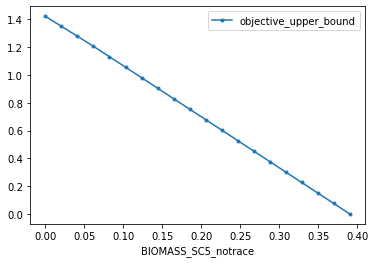

In [24]:
data.plot(x='BIOMASS_SC5_notrace', y='objective_upper_bound', marker='.')